In [1]:
%matplotlib inline

from tqdm.notebook import tqdm as tqdm

# Data Processing 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn import metrics

# Plotting 

import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

# Data

import numpy as np

## Utility Tools

import itertools as it
import pickle
import umap
import gc


c:\MLAI\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\MLAI\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\MLAI\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' dec

### Loading Data

In [2]:
gc.collect()

231

In [3]:
with open("../data/labels", 'rb') as fp:
    targets = pickle.load(fp)

with open('../data/weights_dictionary.pkl', 'rb') as fp:
    weights = pickle.load(fp)

targets = np.array(targets) ##new

In [4]:
weights_array = np.array(tuple(weights.values()))

### UMAP

In [ ]:
reducer = umap.UMAP(random_state=42)

In [ ]:
def plot_fig(embed,tg,digits): 

    plt.figure(figsize=(10,6))

    sc = plt.scatter(embed[:, 0], embed[:, 1], c=tg, cmap='Spectral', s=10)
    plt.gca().set_aspect('equal', 'datalim')
    plt.legend(handles=sc.legend_elements()[0], labels=list(digits), prop={'size': 10})

    plt.title("UMAP projection of digits {digit1} - {digit2} ".format(digit1 = digits[0],digit2 = digits[1] ), fontsize=15);
    plt.savefig("C:/Users/ayush/OneDrive/Desktop/UoE/Dissertation/Implicit Networks/plots/umaps/{digit1}_{digit2}.pdf".format(digit1 = digits[0],digit2 = digits[1]))

    # colors = ["darkorchid", "crimson", "limegreen", "gold"]
    # cmap = matplotlib.colors.ListedColormap(colors[:len(digits)])
    # cmap=plt.cm.get_cmap('Qualitative', len(digits))

    # norm = matplotlib.colors.BoundaryNorm(digits, len(colors))

    # scatter = plt.scatter(
    #     embed[:, 0],
    #     embed[:, 1],
    #     c=tg,
    #     cmap=cmap, 
    #     norm=norm
    # )

    # plt.gca().set_aspect('equal', 'datalim')
    # plt.title('UMAP projection of the MNIST dataset', fontsize=24)

    # plt.colorbar(scatter,boundaries=digits-0.5).set_ticks(digits)
    # plt.colorbar(scatter)
    # plt.scatter(embed[-1,0], embed[-1,1],color='r')
    
    # plt.savefig("figpath/{}.png".format(f_no))

        # bounds = np.append(digits[:-1]-0.5,digits[-1]+0.5)
    # bounds = np.array((-0.5,4.5))
    # print(type(bounds),bounds)
    # plt.colorbar(boundaries=bounds).set_ticks(digits)

    


In [ ]:
def shuffle_arrays(arrays, set_seed=-1):
    """Shuffles arrays in-place, in the same order, along axis=0

    Parameters:
    -----------
    arrays : List of NumPy arrays.
    set_seed : Seed value if int >= 0, else seed is random.
    """
    assert all(len(arr) == len(arrays[0]) for arr in arrays)
    seed = np.random.randint(0, 2**(32 - 1) - 1) if set_seed < 0 else set_seed

    for arr in arrays:
        rstate = np.random.RandomState(seed)
        rstate.shuffle(arr)

In [ ]:
def plot_umaps(weights,target,digits):

    wa = []
    ta = []

    for i in digits:

        index = np.where(target == i)

        weights_array_temp = weights[tuple(index)]
        targets_array_temp = np.ones(weights_array_temp.shape[0])*target[index[0][0]]

        wa.append(weights_array_temp)
        ta.append(targets_array_temp)


    wa = np.vstack(wa)
    ta = np.hstack(ta)

    shuffle_arrays([wa,ta])

    return wa,ta

In [ ]:
for a,b in it.combinations(np.arange(10), 2):

    ws,ts = plot_umaps(weights_array,targets,np.array([a,b]))

    embedding = reducer.fit_transform(np.delete(ws,np.s_[9050:-1],1))

    plot_fig(embedding,ts,np.array([a,b]))

### Classifier

In [7]:
def classifier(input_array,c_name,scale,pca_val = None):

    input_data = input_array

    
    if scale == True:
        
        scaler = StandardScaler()
        input_data = scaler.fit_transform(input_data)

    if pca_val != None:

        pca = PCA(n_components=pca_val)
        input_data = pca.fit_transform(input_data)
        

    x_train, x_test, y_train, y_test = train_test_split(input_data, targets, test_size=0.25, random_state=42)

    if c_name == "logit":

        logisticRegr = LogisticRegression(solver = 'lbfgs')
        logisticRegr.fit(x_train, y_train)

        y_pred = logisticRegr.predict(x_test)

        # Use score method to get accuracy of model
        test_accuracy = logisticRegr.score(x_test, y_test)
        train_accuracy = logisticRegr.score(x_train,y_train)
        
    if c_name == "forest":
        
        rf = RandomForestClassifier(n_estimators=300,max_depth=14)
        rf.fit(x_train, y_train)    

        y_pred = rf.predict(x_test)
        y_pred_train = rf.predict(x_train)

        test_accuracy = accuracy_score(y_test, y_pred)
        train_accuracy = accuracy_score(y_train, y_pred_train)
    
    # Metrics

    print("Test accuracy",test_accuracy,"Train accuracy",train_accuracy)
            
    cm = metrics.confusion_matrix(y_test, y_pred) # Confusion matrix

    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(test_accuracy)
    plt.title(all_sample_title, size = 15);
    plt.savefig("C:/Users/ayush/OneDrive/Desktop/UoE/Dissertation/Implicit Networks/plots/metrics/{classifier}_{pca}.pdf".format(classifier = c_name,pca = pca_val))
        
    return 0

### Visualise

Test accuracy 0.3976 Train accuracy 0.9997333333333334


0

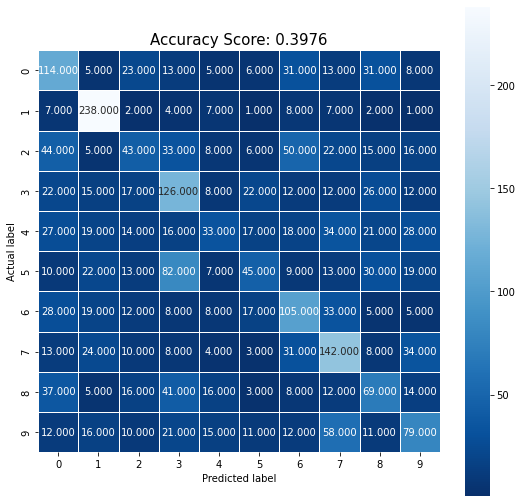

In [8]:
classifier(weights_array,'forest',True,200)

#### SVM with RBF

In [ ]:
# from sklearn.svm import SVC, LinearSVC
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score

In [ ]:
# coefficient = []
# n_supp = []
# sup_vec = []
# i = 0
# df = pd.DataFrame(columns = ['c','gamma','train_acc','test_acc'])
# for c in [10]:
#     for g in [0.01]:
#         svm = SVC(kernel='rbf', C=c, gamma=g)
#         model = svm.fit(x_train, y_train)
#         globals()['model%s' % i] = model
#         d_coef = svm.dual_coef_
#         support = svm.n_support_
#         sv = svm.support_
    
#         p_tr = svm.predict(x_train)
#         a_tr = accuracy_score(y_train, p_tr)
    
#         pred = svm.predict(x_test)
#         a = accuracy_score(y_test, pred)
    
#         coefficient.append(d_coef)
#         n_supp.append(support)
#         sup_vec.append(sv)
#         df.loc[i] = [c,g,a_tr,a]
#         i=i+1



### Archive

In [ ]:
# list1 = np.array([0,5])

# wa = []
# ta = []

# for i in list1:

#     index = np.where(targets == i)

#     weights_array_temp = weights_array[tuple(index)]
#     targets_array_temp = np.ones(weights_array_temp.shape[0])*targets[index[0][0]]

#     wa.append(weights_array_temp)
#     ta.append(targets_array_temp)


# wa = np.vstack(wa)
# ta = np.hstack(ta)

# shuffle_arrays([wa,ta])

# embedding = reducer.fit_transform(np.delete(wa,np.s_[9050:-1],1))

# plot_fig(embedding,ta,list1,5)

In [ ]:
# weights_pd = pd.DataFrame.from_dict(weights)
# weights_pd['digit'] = pd.Series(targets).map(lambda x: 'Digit {}'.format(x))

In [ ]:
# def plot_embedding(interval=19):

#     for i in range(interval):

#         embedding = reducer.fit_transform(np.delete(weights_array,np.s_[500+i:-1],1))

#         plot_fig(embedding,targets,500+i)

#     embedding = reducer.fit_transform(np.delete(weights_array,np.s_[9049+i:-1],1))
#     plot_fig(embedding,targets,9049)
